# Table of Contents

1. [Virtual Environments](#virtual-environments)
2. [Explanation of Python Packages](#explanation-of-python-packages)
3. [API Import](#api-import)
4. [Importing a Local CSV File](#importing-a-local-csv-file)
5. [Looking at Our Data](#looking-at-our-data)
6. [Cleaning Our Data](#cleaning-our-data)
7. [Plots](#plots)
8. [SQL Connect](#sql-connect)


## 1. Virtual Environments <a id="virtual-environments"></a>

A virtual environment is a tool that helps you manage and isolate different Python projects on your system. It allows you to create a self-contained environment with its own set of Python packages and dependencies. Here's a basic explanation:

### Why Use Virtual Environments?
- Isolation: Different projects may require different versions of Python libraries. Virtual environments provide isolation, ensuring that the dependencies for one project do not interfere with those of another.

#### Dependency Management: 
- Virtual environments allow you to define and manage project-specific dependencies separately, avoiding conflicts with system-wide Python packages.


#### Virutal Environment Instructions

1. After you have cloned the repo to your machine, navigate to the project 
folder in GitBash/Terminal.
1. Create a virtual environment in the project folder. `python3 -m venv venv` [^1]
1. Activate the virtual environment. `source venv/bin/activate`
1. Install the required packages. `pip install -r requirements.txt`
1. When you are done working on your repo, deactivate the virtual environment. 
`deactivate`

[^1]: GitBash on Windows uses “python” instead of “python3”

In [158]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from sqlite3 import connect

# 2. Explanation of Python Packages <a id="explanation-of-python-packages"></a>

**Before proceeding with the examples:** please make sure you have the required Python packages installed on your local machine. If you don't have them installed, you can use the following commands to install them:

`pip install pandas requests numpy seaborn pysqlite3`
 
### pandas
- **Purpose:** Pandas is a versatile library for data manipulation and analysis.
- **Description:** It provides easy-to-use data structures (e.g., DataFrame) and tools for cleaning, filtering, and summarizing structured data.

### requests
- **Purpose:** The `requests` package simplifies the process of sending HTTP requests.
- **Description:** It enables Python programs to interact with web services by making it easy to send GET, POST, and other types of HTTP requests and handle the responses.

### json
- **Purpose:** The `json` module facilitates working with JSON data.
- **Description:** JSON is a common data interchange format, and this module allows Python programs to encode (convert to JSON) or decode (convert from JSON) data effortlessly.

### numpy
- **Purpose:** Numpy is a library for numerical operations in Python.
- **Description:** It supports large, multi-dimensional arrays and matrices, along with mathematical functions for scientific and data-related applications.

### seaborn
- **Purpose:** Seaborn is a data visualization library built on top of Matplotlib.
- **Description:** It simplifies the process of creating attractive and informative statistical graphics, making it easy to generate eye-catching charts and graphs with minimal code.

### sqlite3
- **Purpose:** The `sqlite3` module provides a simple way to work with SQLite databases.
- **Description:** SQLite is a lightweight, file-based database, and the `sqlite3` module enables Python programs to connect to and interact with these databases.
- **from sqlite3 import connect:** means that only the connect function is being imported directly into the current namespace (scope) of the Python script or module. This allows you to use connect directly in your code without having to prefix it with the module name.

In summary, these packages cover a broad spectrum of tasks, from handling data to making web requests, working with numerical data, creating visualizations, and interacting with databases. Using these packages can significantly enhance your ability to accomplish various programming tasks without having to write everything from scratch.


# 3. API Import <a id="api-import"></a>
In this example, we efficiently retrieve and import data into a DataFrame through a systematic pagination approach. This method ensures that we retrieve the data in manageable chunks, optimizing the process of populating our DataFrame.

Documentation Link: [https://rickandmortyapi.com/documentation/](https://rickandmortyapi.com/documentation/)


In [159]:
# url = "https://rickandmortyapi.com/api/character" 
# results = []
# page = 1

# while True:
#     response = requests.get(f'{url}?page={page}')
#     data = response.json()

#     if 'results' in data and len(data['results']) > 0:
#         results.extend(data['results'])
#         page += 1
#     else:
#         break
# # This makes out results list a dataframe
# df = pd.DataFrame(results)
# # This saves the csv file locally 
# df.to_csv('student-data.csv')

### Explaining API calls high level

Imagine you have a big box of toys, and these toys are characters from a show called "Rick and Morty." But there are so many characters that you can't see them all at once.

Now, you want to organize these toys, but looking at all of them together is too much. So,you decide to look at a few toys at a time, like flipping through pages in a book. Each time you flip a page, you see a group of characters.

In the computer world, this is similar. The characters are stored on the internet, and you have a special tool (a program) that helps you bring a few characters at a time (a page) and puts them in a list (results). Then, you look at the next page, and the next, until you have all the characters.

Finally, you take all the characters you collected and put them in a neat table (DataFrame) so you can easily see and play with them. Now you have a list of all the characters from the "Rick and Morty" show!


# 4. Importing a Local CSV File <a id="importing-a-local-csv-file"></a>

In [160]:
# Here we are importing the saved csv from above. 
df = pd.read_csv('student-data.csv')

In [161]:
# Reading the CSV file from your local directory
df = pd.read_csv('student-data.csv')

# Display the first few rows to verify
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


#### Understanding `pd.read_csv('rick_n_morty.csv')`

- In the programming world, there's a way to store and organize data neatly in files. A CSV file is one such format, acting like a table with rows and columns.

- When you see `pd.read_csv('rick_n_morty.csv')`, it's a command in Python using the Pandas library. It tells the computer to open a file named 'rick_n_morty.csv' that contains organized data.

- Pandas reads this file, structures the data, and creates a table-like structure called a DataFrame. This DataFrame allows you to manipulate and analyze the information conveniently. Essentially, you're loading data from a file to explore and work with it using Python.


# 5. Looking at Our Data <a id="looking-at-our-data"></a>

### `df.head(2)`

The `df.head(2)` method is used to display the first few rows of the DataFrame. It provides a quick overview of the dataset, allowing you to inspect the initial rows to understand the structure and format of the data. This is particularly useful for assessing data types, spotting any missing values, and getting a sense of the data's overall content.

In [162]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no


### `df.tail(2)`

Similar to `df.head(2)`, the `df.tail(2)` method displays the last few rows of the DataFrame. This is useful for checking the end of the dataset, especially when dealing with time-series data or datasets sorted in a particular order. It can help ensure data integrity and reveal any unexpected patterns or outliers at the end of the dataset.

In [163]:
df.tail(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


### `df.columns`

The `df.columns` attribute returns the column labels of the DataFrame. Knowing the column names is crucial for referencing and manipulating specific columns during data analysis. It allows you to identify the variables present in the dataset and understand the information they contain.

In [164]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

### `df.shape`

The `df.shape` attribute returns a tuple representing the dimensions of the DataFrame, i.e., the number of rows and columns. This information is essential for understanding the size of the dataset, which can impact the choice of analysis techniques and help manage memory efficiently.

In [165]:
df.shape

(395, 31)

### `df.info()`

The `df.info()` method provides a concise summary of the DataFrame's structure, including the data types, non-null values, and memory usage. It is crucial for identifying potential issues such as missing data, ensuring that data types are interpreted correctly, and assessing the overall health of the dataset.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In summary, these operations are fundamental for initial exploratory data analysis (EDA). They help analysts and data scientists gain insights into the structure, content, and quality of the data, setting the foundation for more in-depth analysis and informed decision-making.


# 6. Cleaning Our Data <a id="cleaning-our-data"></a>

## Dropping Columns


In [167]:
# List of columns to drop
columns_to_drop = ['higher', 'internet', 'romantic', 'famrel','address', 'famsize', 'Pstatus', 'goout', 'Walc', 'absences', 'internet', 'reason', 'famsup' ]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df.head(2)


,school,sex,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,paid,activities,nursery,freetime,Dalc,health,passed
0,GP,F,18,4,4,at_home,teacher,mother,2,2,0,yes,no,no,yes,3,1,3,no
1,GP,F,17,1,1,at_home,other,father,1,2,0,no,no,no,no,3,1,3,no


## Importance of Dropping Columns
### 1. **Reducing Redundancy:**

   - **Explanation:**
     - Unneeded columns often contain redundant or duplicate information that does not contribute to the analysis or modeling process.

   - **Importance:**
     - Removing redundant columns reduces unnecessary data storage and computational overhead. It simplifies the dataset and makes it more efficient to work with.

### 2. **Improving Model Performance:**

   - **Explanation:**
     - Unnecessary columns can introduce noise and complexity to predictive models, potentially degrading their performance.

   - **Importance:**
     - Simplifying the dataset by dropping irrelevant columns can improve model accuracy, reduce overfitting, and lead to better generalization on new, unseen data.

### 3. **Enhancing Interpretability:**

   - **Explanation:**
     - Unneeded columns may clutter the dataset and make it more challenging to interpret and understand.

   - **Importance:**
     - A clean and focused dataset with only relevant columns improves the interpretability of the data. This is crucial for effective communication of findings and insights.


### Converting created column to date time

In [168]:
df['studytime'] = pd.to_datetime(df['studytime'])
df

,school,sex,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,paid,activities,nursery,freetime,Dalc,health,passed
0,GP,F,18,4,4,at_home,teacher,mother,2,1970-01-01 00:00:00.000000002,0,yes,no,no,yes,3,1,3,no
1,GP,F,17,1,1,at_home,other,father,1,1970-01-01 00:00:00.000000002,0,no,no,no,no,3,1,3,no
2,GP,F,15,1,1,at_home,other,mother,1,1970-01-01 00:00:00.000000002,3,yes,yes,no,yes,3,2,3,yes
3,GP,F,15,4,2,health,services,mother,1,1970-01-01 00:00:00.000000003,0,no,yes,yes,yes,2,1,5,yes
4,GP,F,16,3,3,other,other,father,1,1970-01-01 00:00:00.000000002,0,no,yes,no,yes,3,1,5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,services,services,other,1,1970-01-01 00:00:00.000000002,2,no,yes,no,yes,5,4,4,no
391,MS,M,17,3,1,services,services,mother,2,1970-01-01 00:00:00.000000001,0,no,no,no,no,4,3,2,yes
392,MS,M,21,1,1,other,other,other,1,1970-01-01 00:00:00.000000001,3,no,no,no,no,5,3,3,no
393,MS,M,18,3,2,services,other,mother,3,1970-01-01 00:00:00.000000001,0,no,no,no,no,4,3,5,yes


### Importance of Converting a Date Column to DateTime

1. **Time-Based Analysis:**
   - *Explanation:* Conversion enables time-based analysis, allowing for trend identification, temporal comparisons, and aggregations over specific intervals.
   - *Importance:* It provides essential insights into time-dependent patterns, crucial for industries like finance, sales, and operations.

2. **Data Consistency and Sorting:**
   - *Explanation:* Datetime conversion ensures standardized formats, promoting consistent representation. This simplifies sorting, filtering, and prevents issues related to mixed date formats.
   - *Importance:* Consistent date formats improve data integrity and simplify time-ordered dataset handling.

3. **Date Arithmetic and Calculations:**
   - *Explanation:* Datetime objects support arithmetic operations, facilitating accurate date calculations, such as differences, additions, and subtractions.
   - *Importance:* It enables precise and efficient date-related calculations, essential for tasks like forecasting, duration calculations, and creating time-based features.


### Lets convert gender to a category

In [169]:
df['sex'] = df['sex'].astype('category')
df

,school,sex,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,paid,activities,nursery,freetime,Dalc,health,passed
0,GP,F,18,4,4,at_home,teacher,mother,2,1970-01-01 00:00:00.000000002,0,yes,no,no,yes,3,1,3,no
1,GP,F,17,1,1,at_home,other,father,1,1970-01-01 00:00:00.000000002,0,no,no,no,no,3,1,3,no
2,GP,F,15,1,1,at_home,other,mother,1,1970-01-01 00:00:00.000000002,3,yes,yes,no,yes,3,2,3,yes
3,GP,F,15,4,2,health,services,mother,1,1970-01-01 00:00:00.000000003,0,no,yes,yes,yes,2,1,5,yes
4,GP,F,16,3,3,other,other,father,1,1970-01-01 00:00:00.000000002,0,no,yes,no,yes,3,1,5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,services,services,other,1,1970-01-01 00:00:00.000000002,2,no,yes,no,yes,5,4,4,no
391,MS,M,17,3,1,services,services,mother,2,1970-01-01 00:00:00.000000001,0,no,no,no,no,4,3,2,yes
392,MS,M,21,1,1,other,other,other,1,1970-01-01 00:00:00.000000001,3,no,no,no,no,5,3,3,no
393,MS,M,18,3,2,services,other,mother,3,1970-01-01 00:00:00.000000001,0,no,no,no,no,4,3,5,yes


### Converting a Gender Column to Category

1. **Memory Efficiency:**
   - *Explanation:* Converting gender to a category saves memory, making data operations faster and more resource-friendly, especially in large datasets.

2. **Analysis and Visualization:**
   - *Explanation:* Categories simplify gender-related analysis and visualizations, providing a clear and organized way to represent and interpret data.

3. **Standardization and Consistency:**
   - *Explanation:* Converting to a category ensures consistent gender labels, reducing errors and making it easier to handle and analyze data accurately.

In essence, converting the gender column to a category streamlines data management, supports efficient analysis, and ensures a standardized representation for improved data quality.


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   school      395 non-null    object        
 1   sex         395 non-null    category      
 2   age         395 non-null    int64         
 3   Medu        395 non-null    int64         
 4   Fedu        395 non-null    int64         
 5   Mjob        395 non-null    object        
 6   Fjob        395 non-null    object        
 7   guardian    395 non-null    object        
 8   traveltime  395 non-null    int64         
 9   studytime   395 non-null    datetime64[ns]
 10  failures    395 non-null    int64         
 11  schoolsup   395 non-null    object        
 12  paid        395 non-null    object        
 13  activities  395 non-null    object        
 14  nursery     395 non-null    object        
 15  freetime    395 non-null    int64         
 16  Dalc        395 non-null  

In the output of `df.info()`, observe the changes in data types. The "gender" column, which was originally a object, now appears as 'category', indicating a successful conversion. Similarly, the "created" column, which was previously a object as well, now appears as 'datetime64[ns, UTC]', reflecting the successful conversion to datetime.

This usage of `df.info()` after the conversions provides a concise summary of the DataFrame's data types, showcasing the transformations made to the "gender" and "created" columns.


# 7. Plots <a id="plots"></a>

### Quick pandas plot 

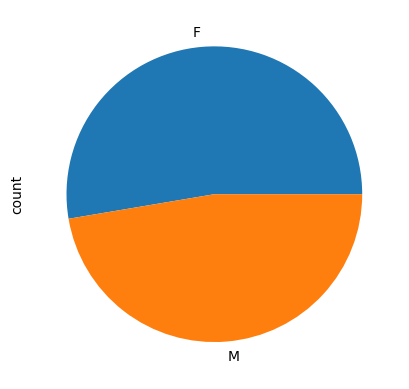

In [171]:
df['sex'].value_counts().plot.pie();

In [172]:
# Count the number of males and females
gender_counts = df['sex'].value_counts()
gender_counts

sex
F    208
M    187
Name: count, dtype: int64

When utilizing `df['gender'].value_counts().plot.pie()`, you are creating a pie chart to visualize the distribution of gender values in the DataFrame. Let's break down why this is useful:

- **Insight into Categorical Distribution:**
  - *Explanation:* The `value_counts()` method counts the occurrences of each unique value in the 'gender' column, providing a clear distribution of categorical data.
  - *Importance:* The resulting pie chart visually represents the relative proportions of each gender category, offering a quick and intuitive understanding of the data's categorical distribution.

- **Quick Exploration of Data Patterns:**
  - *Explanation:* A pie chart is effective for gaining insights into the overall patterns and proportions of categorical variables. It is particularly useful when dealing with a small number of categories.
  - *Importance:* Rapid visual exploration allows for the identification of dominant categories and provides a snapshot of the data's composition.

- **Communication of Findings:**
  - *Explanation:* The simplicity of a pie chart makes it suitable for communicating categorical distributions to a broader audience, such as stakeholders or team members.
  - *Importance:* It facilitates clear and straightforward communication of gender distribution patterns without the need for complex visualizations, enhancing the accessibility of data insights.

In summary, using `df['gender'].value_counts().plot.pie()` is a concise and effective way to visually represent the distribution of categorical data, offering insights into the proportions and patterns within the 'gender' column.


### matplotlib plot of the number of characters created in a month

In [173]:
# Assuming df is your DataFrame
date_range = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df['creation_date'] = np.random.choice(date_range, size=len(df))

# Now you can use the .dt accessor
df['creation_month'] = df['creation_date'].dt.to_period('M')
monthly_counts = df['creation_month'].value_counts().sort_index()


#checks the code is correct
df.head()

,school,sex,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,...,schoolsup,paid,activities,nursery,freetime,Dalc,health,passed,creation_date,creation_month
0,GP,F,18,4,4,at_home,teacher,mother,2,1970-01-01 00:00:00.000000002,...,yes,no,no,yes,3,1,3,no,2023-04-16,2023-04
1,GP,F,17,1,1,at_home,other,father,1,1970-01-01 00:00:00.000000002,...,no,no,no,no,3,1,3,no,2023-01-03,2023-01
2,GP,F,15,1,1,at_home,other,mother,1,1970-01-01 00:00:00.000000002,...,yes,yes,no,yes,3,2,3,yes,2023-10-06,2023-10
3,GP,F,15,4,2,health,services,mother,1,1970-01-01 00:00:00.000000003,...,no,yes,yes,yes,2,1,5,yes,2023-11-26,2023-11
4,GP,F,16,3,3,other,other,father,1,1970-01-01 00:00:00.000000002,...,no,yes,no,yes,3,1,5,yes,2023-05-09,2023-05


In [174]:
# counting how many students have a particular study time:
studytime_counts = df['studytime'].value_counts()
studytime_counts

studytime
1970-01-01 00:00:00.000000002    198
1970-01-01 00:00:00.000000001    105
1970-01-01 00:00:00.000000003     65
1970-01-01 00:00:00.000000004     27
Name: count, dtype: int64

### Explanation of the Code Block Above

1. **Creating a New Column:**
   - *Purpose:* We are adding a new column called 'creation_month' to our DataFrame (`df`).
   - *How:* We take the 'created' column and extract only the month information, storing it in the new column.

2. **Counting Creations per Month:**
   - *Purpose:* We want to know how many creations happened in each month.
   - *How:* We group the data by the 'creation_month' column and count the number of occurrences for each unique month. This count is stored in the `monthly_counts` variable.

3. **Checking the Data:**
   - *Purpose:* To make sure our code is working correctly, we look at the first two rows of our DataFrame.
   - *How:* We use `df.head(2)` to display the first two rows, helping us verify that the 'creation_month' column was added correctly.

In summary, this code helps us understand and analyze the distribution of creations over different months in our DataFrame.


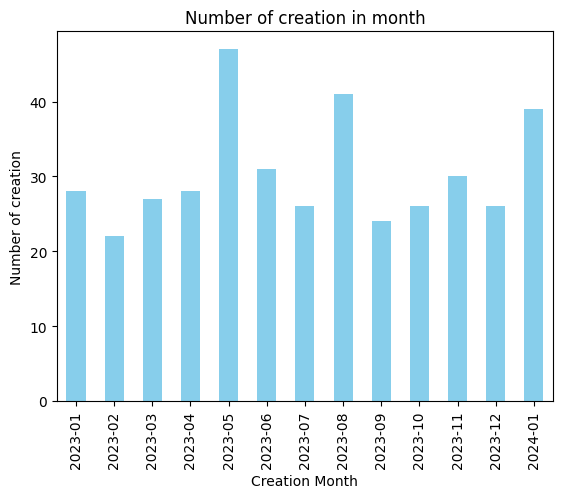

In [175]:
# Plot the data
monthly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Creation Month')
plt.ylabel('Number of creation')
plt.title('Number of creation in month')
plt.show()

### Explanation of the Plot Code Block

1. **Plotting the Data:**
   - *Purpose:* We want to visualize the number of creations per month in a bar chart.
   - *How:* Using the `monthly_counts` variable (which contains the count of creations for each month), we create a bar plot with bars representing each month's count.

2. **Customizing the Plot:**
   - *Purpose:* To make the plot informative and visually appealing.
   - *How:* We customize the plot by adding labels to the x-axis (`Creation Month`) and y-axis (`Number of Creations`). Additionally, we give the plot a title (`Number of Creations Per Month`).

3. **Displaying the Plot:**
   - *Purpose:* To see the created bar chart.
   - *How:* We use `plt.show()` to display the finalized plot.

In summary, this code block is responsible for creating a bar chart that shows the number of creations per month. The customization ensures that the plot is easy to understand and provides insights into the monthly distribution of creations.


# 8. SQL Connect <a id="sql-connect"></a>


***This is a more advanced example, showcasing the capability to seamlessly integrate a CSV file into Python and execute SQL queries on it.***

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   school          395 non-null    object        
 1   sex             395 non-null    category      
 2   age             395 non-null    int64         
 3   Medu            395 non-null    int64         
 4   Fedu            395 non-null    int64         
 5   Mjob            395 non-null    object        
 6   Fjob            395 non-null    object        
 7   guardian        395 non-null    object        
 8   traveltime      395 non-null    int64         
 9   studytime       395 non-null    datetime64[ns]
 10  failures        395 non-null    int64         
 11  schoolsup       395 non-null    object        
 12  paid            395 non-null    object        
 13  activities      395 non-null    object        
 14  nursery         395 non-null    object        
 15  freeti

In [177]:
# Convert 'studytime' to datetime and then to string
df['studytime'] = pd.to_datetime(df['studytime'], errors='coerce').astype(str)

# Convert 'creation_month' to string (assuming it exists in the DataFrame)
df['creation_month'] = df['creation_month'].astype(str)

# Define the SQLite connection
conn = connect(':memory:')  # This creates an in-memory database; use 'your_file.db' for a file-based database

# Save DataFrame to the SQLite database
df.to_sql('df', conn, if_exists='replace', index=False)  

# Save DataFrame to the existing SQLite connection with explicit data type specification
dtype_mapping = {
    'Unnamed: 0': 'INTEGER',
    'school': 'INTEGER',
    'sex': 'TEXT',
    'age': 'TEXT',
    'address': 'TEXT',
    'famsize': 'TEXT',
    'Pstatus': 'TEXT',
    'Medu': 'TEXT',
    'Fedu': 'TEXT'
}
conn = connect(':memory:')
# create tables
df.to_sql('df', conn)
# convenient function
def sql(a_string):
    return(pd.read_sql(a_string, conn))
          

#Define a function to execute SQL queries
def sql(query):
    return pd.read_sql(query, conn)

### Explanation in Simple Terms:

1. **Converting Date Columns:**
   - *Purpose:* We want to change how the date information looks in our data.
   - *How:* We change the 'created' column to a string (text) format, making it easier to read. Similarly, we do the same for the 'creation_month' column.

2. **Saving to SQLite Database:**
   - *Purpose:* We're saving our DataFrame to a special type of database called SQLite.
   - *How:* We specify the data types for each column (like 'INTEGER' for numbers and 'TEXT' for text) and then save our DataFrame to an in-memory SQLite connection.

3. **Convenient Function:**
   - *Purpose:* We create a helpful function to execute SQL queries on our SQLite database and return the results as a DataFrame.
   - *How:* The `sql` function takes a SQL query as a string, executes it on the SQLite connection, and returns the results in a DataFrame.

In summary, this code makes our date columns easier to read by converting them to strings and then saves our DataFrame to an SQLite database, providing a convenient way to query and analyze the data using SQL commands.


### Finding the number of rows in the data

In [178]:
sql("""SELECT COUNT(*) 
    AS row_count 
    FROM df;""")

,row_count
0,395



- **`SELECT COUNT(*)`:** This part of the query selects the count of rows. The `COUNT(*)` function is used to count all rows in the specified table.

- **`AS row_count`:** This renames the result column to be called `row_count`. The `AS` keyword is used to give a user-friendly name to the result of the `COUNT(*)` function.

- **`FROM df`:** This specifies the table from which the count is being calculated. In this case, it's a table named `df`.

So, in simple terms, this query is asking: "How many rows are there in the table named `df`?" The result will be a single value, which represents the total number of rows in that table.


### Finding the NAME and SPECIES of ALL characters who guardian and MALE. 

In [179]:
sql("""SELECT guardian, sex
    FROM df
    WHERE guardian = 'father' AND 'Fjob' = 'teacher';""")

,guardian,sex



- **`SELECT name, species`:** This part of the query selects the 'name' and 'species' columns from the DataFrame.

- **`FROM df`:** Specifies that the data is being selected from a table named `df`. 

- **`WHERE status = 'Alive' AND gender = 'Male'`:** This filters the rows based on conditions. It retrieves only those rows where the 'status' column has the value 'Alive' and the 'gender' column has the value 'Male'.

So, in simple terms, this query is asking: "Give me the 'name' and 'species' columns for rows where the 'status' is 'Alive' and the 'gender' is 'Male' from the DataFrame named `df`." The result will be a subset of the original DataFrame that meets these specified conditions.


### Finding the numbers of creations per month

This query will replicate the data and graph created using Matplotlib from above. 

In [180]:
sql("""SELECT creation_month, 
    COUNT(*) 
    AS creations_per_month
    FROM df
    GROUP BY creation_month;""")

,creation_month,creations_per_month
0,2023-01,28
1,2023-02,22
2,2023-03,27
3,2023-04,28
4,2023-05,47
5,2023-06,31
6,2023-07,26
7,2023-08,41
8,2023-09,24
9,2023-10,26



- **`SELECT creation_month, COUNT(*) AS creations_per_month`:** This part of the query selects the 'creation_month' column and counts the occurrences of each unique month. The result is renamed as 'creations_per_month' for clarity.

- **`FROM df`:** Specifies that the data is being selected from a table named `df`. In this context, `df` is assumed to be the name of the table or DataFrame.

- **`GROUP BY creation_month`:** This groups the data based on the 'creation_month' column. It's used in conjunction with the aggregate function (`COUNT(*)`) to count the number of creations for each unique month.

So, in simple terms, this query is asking: "Count the number of creations for each unique month and display the results along with the corresponding month in the DataFrame named `df`." The result will be a table with two columns, 'creation_month' and 'creations_per_month', showing the count of creations for each month.


### Comparing Pandas and SQL Approaches


#### Pandas Code:
```python
# Create a new column 'creation_month' with the month information
df['creation_month'] = df['studytime'].dt.to_period('M')

# Group by month and count the number of creations
monthly_counts = df['creation_month'].value_counts().sort_index() 



#### SQL Query:
```sql
SELECT creation_month, 
    COUNT(*) AS creations_per_month
FROM df
GROUP BY creation_month;

# Here we plot the last query and see if it matches the pandas plot. 

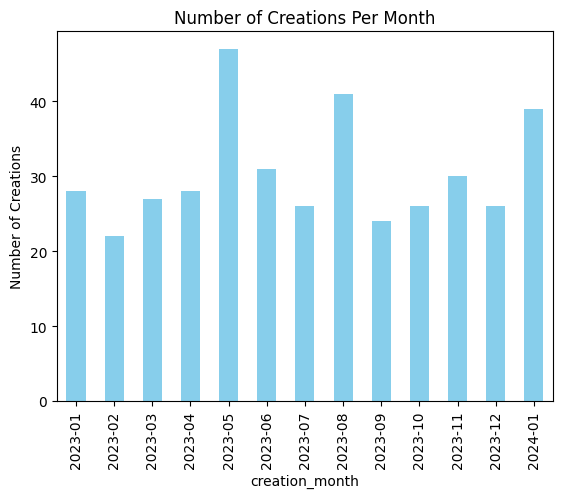

In [181]:
sql("""SELECT creation_month, 
    COUNT(*) 
    AS creations_per_month
    FROM df
    GROUP BY creation_month;""").plot.bar(x='creation_month', ylabel='Number of Creations', title='Number of Creations Per Month', color='skyblue', legend=False);

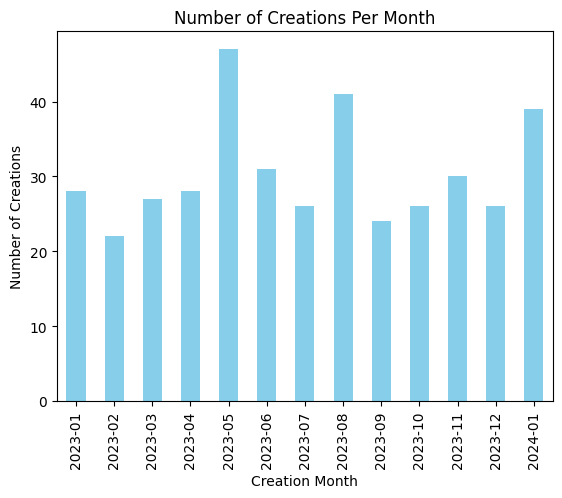

In [182]:
# Plot the data
monthly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Creation Month')
plt.ylabel('Number of Creations')
plt.title('Number of Creations Per Month')
plt.show()

## Conclusion of plots 
Even though we're using different tools (Pandas and SQL), both the Pandas code and SQL query do the same thing—they summarize and show the distribution of creations over time. This shows that even with different tools, we can achieve the same results in data analysis.
